**[SQL Course Home Page](https://www.kaggle.com/learn/SQL)**

---


# Intro

The first test of your new data exploration skills uses a data describing crime in the city of Chicago.

Before you get started, run the following cell. It sets up the automated feedback system to review your answers, and then it sets up the database helper object so you can connect to the database.

In [1]:
# Set up feedack system
from learntools.core import binder
binder.bind(globals())
from learntools.sql.ex1 import *


# create a helper object for our bigquery dataset
import bq_helper
chicago_crime = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                         dataset_name = "chicago_crime")
print("Setup Complete")

Using Kaggle's public dataset BigQuery integration.
Setup Complete


For reference, here is all the code you saw in the first tutorial:

```
hacker_news = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "hacker_news")
hacker_news.list_tables()
hacker_news.table_schema("full")
hacker_news.head("full")
hacker_news.head("full", selected_columns="by", num_rows=10)
```

# Exercises

## 1
How many tables are in the Chicago Crime dataset?

In [2]:
chicago_crime.list_tables() # Write the code you need here to figure out the answer

['crime']

In [3]:
num_tables = 1  # store the answer as num_tables and then run this cell

q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For a hint or the solution, comment the appropriate line below.

In [4]:
# q_1.hint()
# q_1.solution()

## 2

How many columns in the `crime` table have `TIMESTAMP` data?

In [5]:
chicago_crime.table_schema("crime")# Write the code to figure out the answer


,name,type,mode,description
0,unique_key,INTEGER,REQUIRED,Unique identifier for the record.
1,case_number,STRING,NULLABLE,The Chicago Police Department RD Number (Recor...
2,date,TIMESTAMP,NULLABLE,Date when the incident occurred. this is somet...
3,block,STRING,NULLABLE,The partially redacted address where the incid...
4,iucr,STRING,NULLABLE,The Illinois Unifrom Crime Reporting code. Thi...
5,primary_type,STRING,NULLABLE,The primary description of the IUCR code.
6,description,STRING,NULLABLE,"The secondary description of the IUCR code, a ..."
7,location_description,STRING,NULLABLE,Description of the location where the incident...
8,arrest,BOOLEAN,NULLABLE,Indicates whether an arrest was made.
9,domestic,BOOLEAN,NULLABLE,Indicates whether the incident was domestic-re...


In [6]:
num_timestamp_fields = 2 # put your answer here

q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For a hint or the solution, comment the appropriate line below.

In [7]:
# q_2.hint()
# q_2.solution()

## 3

If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the database to plot the crimes on a map?

In [8]:
chicago_crime.head("crime", selected_columns="latitude,longitude", num_rows=10) # Write the code here to explore the data so you can find the answer

,latitude,longitude
0,41.993708,-87.792769
1,41.798269,-87.723303
2,41.709581,-87.659802
3,41.777973,-87.765764
4,41.726829,-87.599744
5,41.805025,-87.724725
6,41.806820,-87.732124
7,41.777849,-87.772324
8,41.702733,-87.534930
9,41.692834,-87.604319


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap

In [10]:
import os

In [11]:
os.listdir('../input/chicago-crime/')

['Neighborhoods_2012b.sbx',
 'Neighborhoods_2012b.prj',
 'Neighborhoods_2012b.sbn',
 'Neighborhoods_2012b.shx',
 'Neighborhoods_2012b.dbf',
 'Neighborhoods_2012b.shp']

In [12]:
street_map = gpd.read_file('../input/chicago-crime/Neighborhoods_2012b.shp')

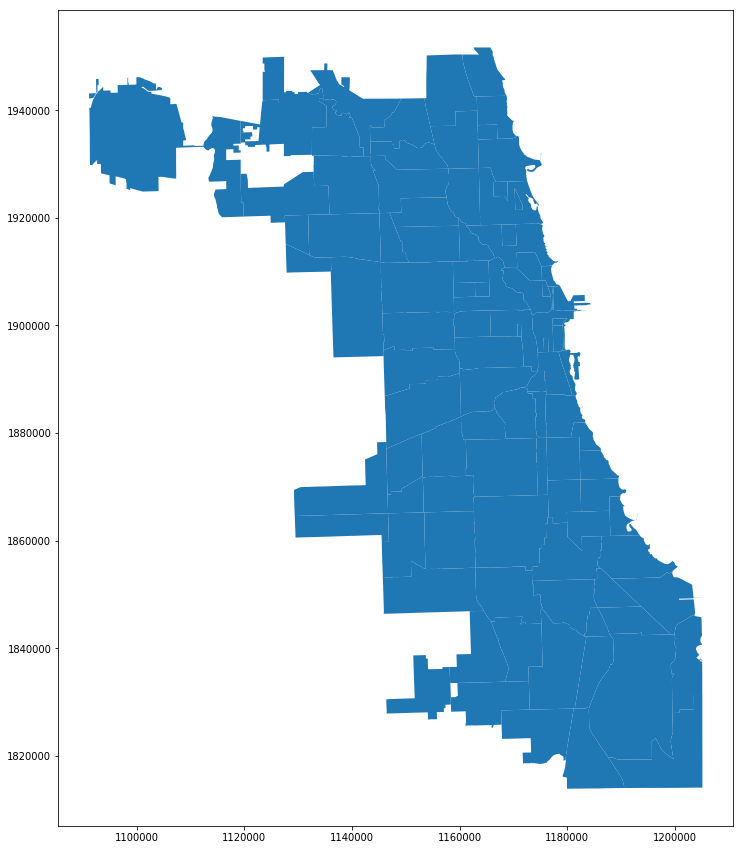

In [13]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [14]:
crs = {'init': 'epsg:4326'}

In [15]:
geometry = [point(xy) for xy in zip(chicago_crime["longitude"],chicago_crime["latitude"])]
geometry[:3]

TypeError: 'BigQueryHelper' object is not subscriptable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Unrecognized character l in format string

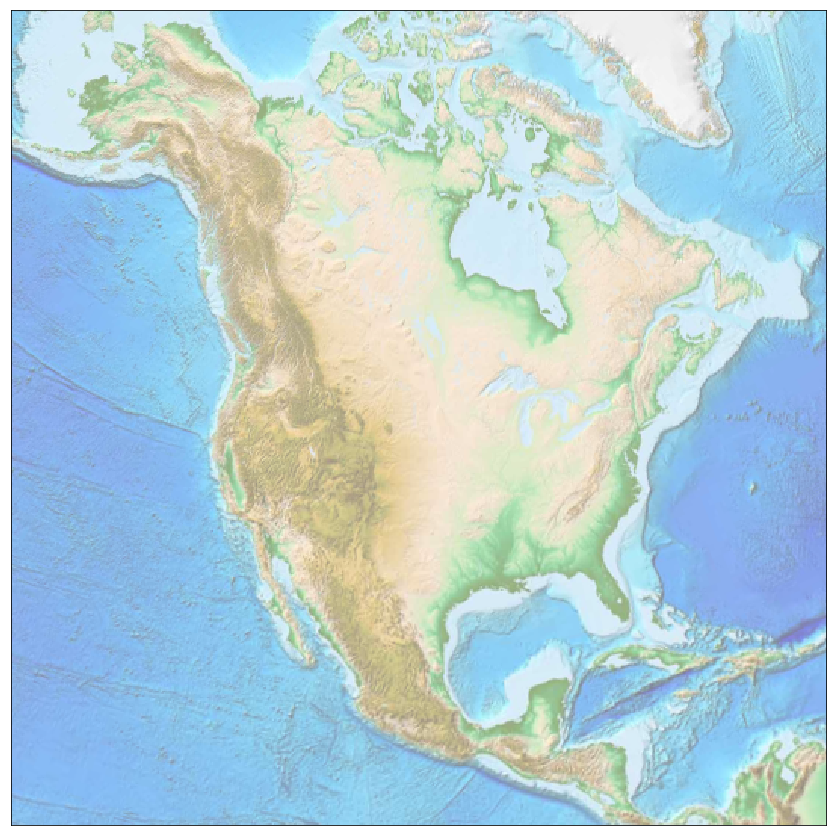

In [16]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
#x, y = m(-122.3, 47.6)
plt.plot('longitude', 'latitude')
plt.text('longitude', 'latitude');

In [17]:
fields_for_plotting = chicago_crime['latitude','longitude']

q_3.check()

TypeError: 'BigQueryHelper' object is not subscriptable

For a hint or the solution, comment the appropriate line below.

In [18]:
# q_3.hint()
# q_3.solution()

Thinking about the question above, there are a columns that appear to have geographic data. Look at a few values (with the `head` command) to see if you can determine their relationship.  Two columns will still hard to interpret. But it should be obvious how the `location` column relates to `latitude` and `longitude`.

In [19]:
# Scratch space for your code

# Keep Going

You've looked at the schema, but you haven't yet done anything exciting at the data itself. Things get more interesting when you get to the data, so keep going to learn **[Select Queries](https://www.kaggle.com/dansbecker/select-from-where).**

---
**[SQL Course Home Page](https://www.kaggle.com/learn/SQL)**

